# Clustering of Music Genres
Bu projede Spotify şarkıları türlerine göre kümelenmeye çalışılmıştır.
<br>Projede kullanılan veriler <a href="https://thecleverprogrammer.com/2022/04/05/clustering-music-genres-with-machine-learning/" target="_blank">
buradan</a> temin edilmiştir.
<br>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuPtFfmZkjFIheNAXYa8WbDKCbkuW6Sd31lQ&s" width="300px">

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Spotify-2000.csv")

## Keşfedici Veri Analizi (EDA)

In [3]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [5]:
df["Top Genre"].value_counts()

Top Genre
album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: count, Length: 149, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int32 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [100]:
df["Length (Duration)"].unique()
# Bu alan sayısal veri içermesine rağmen tipi object olarak görülüyor. Tekil verilere bakıldığında virgüllü sayılar içerdiği görülmektedir.

array([ 201,  207,  341,  269,  256,  247,  257,  366,  223,  290,  162,
        232,  214,  639,  173,  236,  288,  276,  352,  296,  218,  176,
        197,  261,  270,  298,  259,  306,  310,  211,  186,  185,  264,
        202,  263,  266,  629,  177,  237,  278,  331,  355,  213,  234,
        216,  275,  467,  243,  219,  305,  215,  144,  195,  240,  357,
        297,  281,  273,  212,  279,  249,  229,  394,  375,  226,  210,
        258,  283,  231,  268,  403,  321,  217,  308,  206,  208,  242,
        326,  199,  225,  193,  302,  294,  238,  433,  324,  154,  245,
        248,  311,  272,  289,  253,  181,  184,  203,  280,  146,  196,
        204,  602,  353,  189,  423,  233,  135,  141,  241,  262,  346,
        319,  284,  501,  287,  170,  187,  171,  414,  252,  209,  364,
        246,  235,  161,  274,  286,  172,  404,  239,  244,  291,  251,
        260,  190,  122,  336,  228,  222,  267,  220,  139,  227,  277,
        125,  335,  386,  376,  150,  174,  317,  3

In [11]:
df["Length (Duration)"]=df["Length (Duration)"].str.replace(",","").astype(int)
# Bu alandaki virgüllerden kurtulalım

## Modelleme

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [16]:
dfc=df.drop(["Index", "Title", "Artist", "Top Genre"], axis=1)

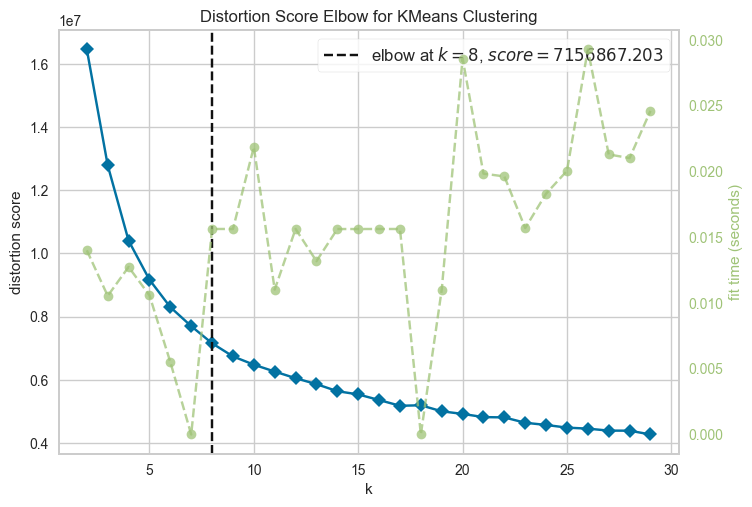

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:
km=KMeans()
vis=KElbowVisualizer(km, k=(2,30))
vis.fit(dfc)
vis.show()

Müzik türleri fazla olduğundan küme maksimum sayısı 30 seçilerek dirsek metodu uygulandı. 
Bu metoda göre 8 kümenin uygun olacağına karar verildi.

In [76]:
model=KMeans(n_clusters=8)
model=model.fit(dfc)

In [77]:
pred=model.predict(dfc)

In [78]:
dfc["Cluster"]=pred
df["Cluster"]=pred

In [79]:
dfc.head()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Cluster
0,2004,157,30,53,-14,11,68,201,94,3,71,1
1,2000,135,79,50,-11,17,81,207,17,7,39,6
2,2001,168,69,66,-9,7,52,341,2,17,69,0
3,2007,173,96,43,-4,3,37,269,0,4,76,3
4,2002,106,82,58,-5,10,87,256,1,3,59,3


In [80]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Cluster
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,1
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,6
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,0
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,3
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,3


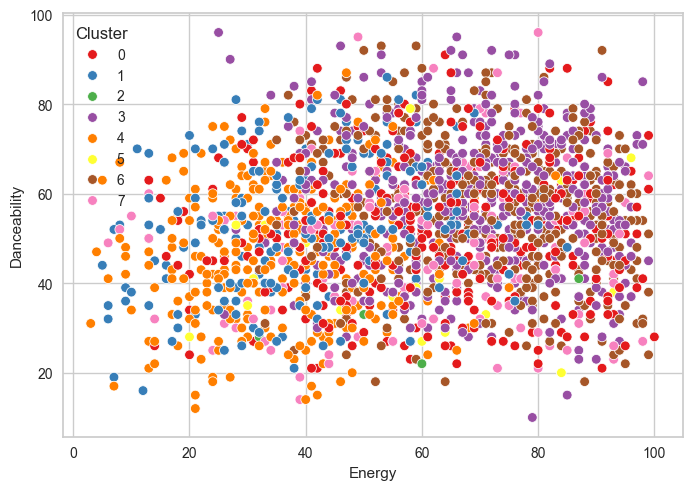

In [91]:
sns.scatterplot(x=df['Energy'], y=df['Danceability'], hue=df['Cluster'], palette='Set1');

<b>Energy</b> ve <b>Danceability</b> alanlarına göre yapılan kümelemenin çok anlamlı olmadığı görülmektedir. Bu nedenle 
aşağıdaki grafiğe <b>Beats Per Minute (BPM)</b> alanıda eklenerek 3 boyutlu ilişkisine bakmakıldı. Çok fazla birliktelik olmasa da bu grafikte
renklerin bir araya toplandığı hissedilmektedir.

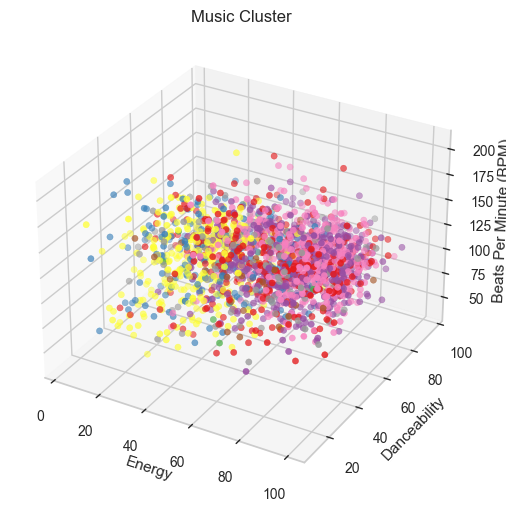

In [82]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(df['Energy'], df['Danceability'], df['Beats Per Minute (BPM)'], c=df['Cluster'], cmap='Set1')

# Eksen etiketlerini ayarlama
ax.set_xlabel('Energy')
ax.set_ylabel('Danceability')
ax.set_zlabel('Beats Per Minute (BPM)')

# Başlığı ve grafiği gösterme
plt.title('Music Cluster')
plt.show()

Aşağıdaki grafikte <b>Liveness</b>, <b>Valence</b> ve <b>Loudness (dB)</b> alanlarına göre şarkıların dağılımı incelendi.
Burada da yapılan kümeleme sonucu benzer şarkıların bir araya toplandığı hissedilmektedir.

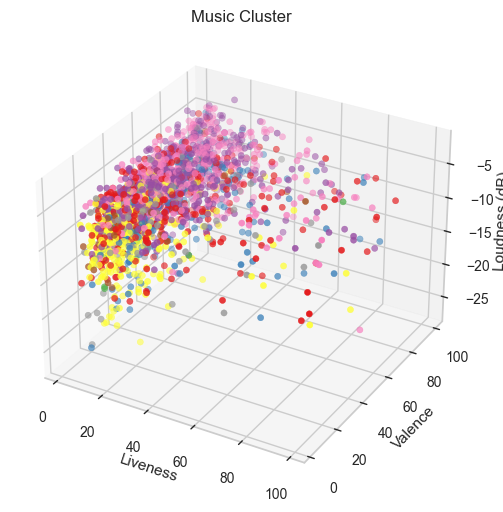

In [84]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(df['Liveness'], df['Valence'], df['Loudness (dB)'], c=df['Cluster'], cmap='Set1')

# Eksen etiketlerini ayarlama
ax.set_xlabel('Liveness')
ax.set_ylabel('Valence')
ax.set_zlabel('Loudness (dB)')

# Başlığı ve grafiği gösterme
plt.title('Music Cluster')
plt.show()

<Axes: xlabel='Cluster'>

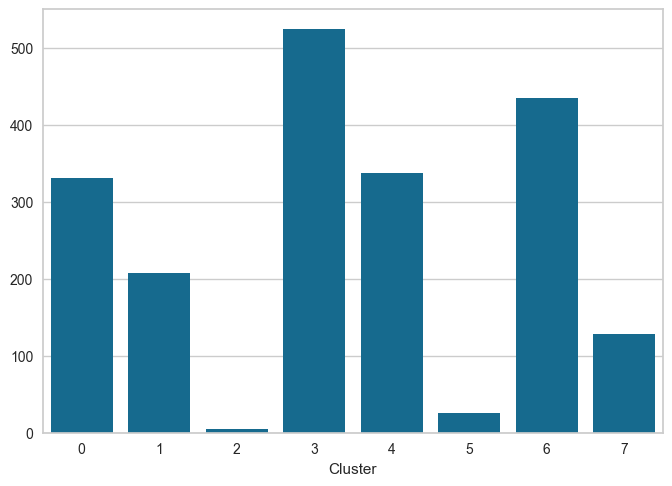

In [85]:
sns.barplot(x=df["Cluster"].value_counts().index, y=df["Cluster"].value_counts().values)

Yıl bazlı kümeler incelendiğinde sadece 2 numaralı kümenin 70-80 yılları arasında olduğu görülmektedir. 
Diğer kümeler yıllara benzer oranlarda yayılma göstermektedir.

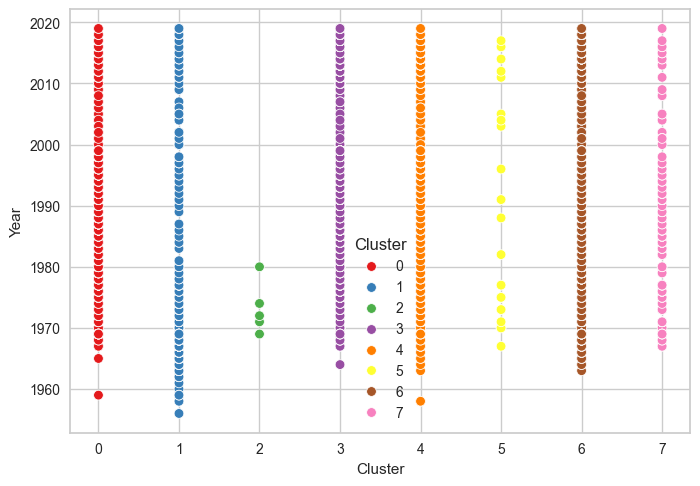

In [90]:
sns.scatterplot(x=df['Cluster'], y=df['Year'], hue=df['Cluster'], palette='Set1');

In [92]:
from sklearn.decomposition import PCA

In [95]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(dfc), columns=["PCA1", "PCA2"])

In [96]:
df_pca.head()

,PCA1,PCA2
0,-64.855292,44.295648
1,-56.346842,-33.127989
2,78.717849,-38.369324
3,8.408481,-46.902034
4,-7.796427,-42.953855


In [97]:
dfc["PCA1"]=df_pca["PCA1"]
dfc["PCA2"]=df_pca["PCA2"]

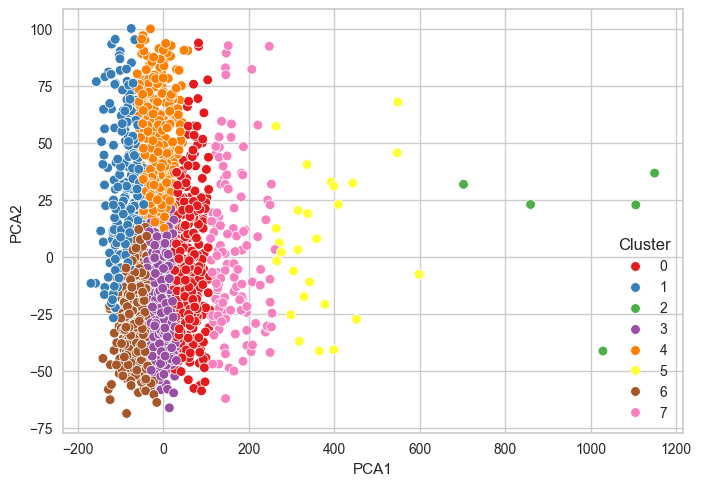

In [99]:
sns.scatterplot(x=dfc['PCA1'], y=dfc['PCA2'], hue=dfc['Cluster'], palette='Set1');

Kümeleme yapılırken tüm sayısal alanlar modele dahil edildiği için bu alanları PCA ile iki sütuna indirip küme analizi yapıldı. 
Yukarıdaki grafikte kümeler çok daha belirgin bir şekilde dağılım göstermektedir. 

### Hierarchical Clustering Model

In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage 

In [102]:
dfc.head()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Cluster,PCA1,PCA2
0,2004,157,30,53,-14,11,68,201,94,3,71,1,-64.855292,44.295648
1,2000,135,79,50,-11,17,81,207,17,7,39,6,-56.346842,-33.127989
2,2001,168,69,66,-9,7,52,341,2,17,69,0,78.717849,-38.369324
3,2007,173,96,43,-4,3,37,269,0,4,76,3,8.408481,-46.902034
4,2002,106,82,58,-5,10,87,256,1,3,59,3,-7.796427,-42.953855


In [103]:
x=dfc.drop(["Cluster", "PCA1", "PCA2"], axis=1)

In [104]:
data=linkage(x, method="ward", metric="euclidean")

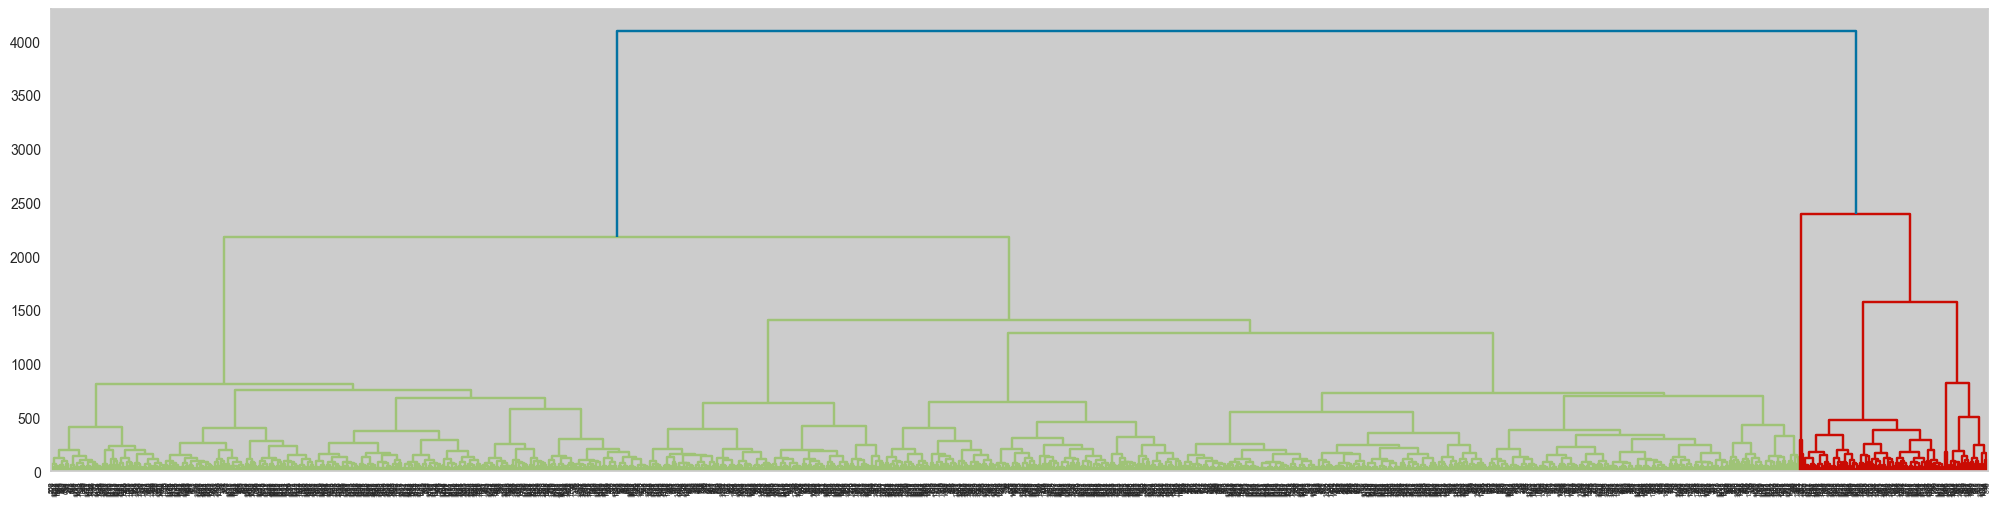

In [105]:
plt.figure(figsize=(25,6))
dendrogram(data);